In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn; seaborn.set()
from sklearn.metrics import mean_squared_error
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [5]:
data = pd.read_csv("bitcoin_price_Training - Training.csv")
print(data.head(5))
print(data.tail(5))
data.dtypes
data.info()
data.describe()

           Date     Open     High      Low    Close         Volume  \
0  Jul 31, 2017  2763.24  2889.62  2720.61  2875.34    860,575,000   
1  Jul 30, 2017  2724.39  2758.53  2644.85  2757.18    705,943,000   
2  Jul 29, 2017  2807.02  2808.76  2692.80  2726.45    803,746,000   
3  Jul 28, 2017  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
4  Jul 27, 2017  2538.71  2693.32  2529.34  2671.78    789,104,000   

       Market Cap  
0  45,535,800,000  
1  44,890,700,000  
2  46,246,700,000  
3  44,144,400,000  
4  41,816,500,000  
              Date    Open    High     Low   Close Volume     Market Cap
1551  May 02, 2013  116.38  125.60   92.28  105.21      -  1,292,190,000
1552  May 01, 2013  139.00  139.89  107.72  116.99      -  1,542,820,000
1553  Apr 30, 2013  144.00  146.93  134.05  139.00      -  1,597,780,000
1554  Apr 29, 2013  134.44  147.49  134.00  144.54      -  1,491,160,000
1555  Apr 28, 2013  135.30  135.98  132.10  134.21      -  1,500,520,000
<class 'pandas.core.f

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [7]:
data = pd.read_csv("bitcoin_price_Training - Training.csv",index_col= 'Date')
print(data.head(5)) 
data.info()
data.index = pd.to_datetime(data.index)
print(data.index)
data.head(5)

                 Open     High      Low    Close         Volume  \
Date                                                              
Jul 31, 2017  2763.24  2889.62  2720.61  2875.34    860,575,000   
Jul 30, 2017  2724.39  2758.53  2644.85  2757.18    705,943,000   
Jul 29, 2017  2807.02  2808.76  2692.80  2726.45    803,746,000   
Jul 28, 2017  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
Jul 27, 2017  2538.71  2693.32  2529.34  2671.78    789,104,000   

                  Market Cap  
Date                          
Jul 31, 2017  45,535,800,000  
Jul 30, 2017  44,890,700,000  
Jul 29, 2017  46,246,700,000  
Jul 28, 2017  44,144,400,000  
Jul 27, 2017  41,816,500,000  
<class 'pandas.core.frame.DataFrame'>
Index: 1556 entries, Jul 31, 2017 to Apr 28, 2013
Data columns (total 6 columns):
Open          1556 non-null float64
High          1556 non-null float64
Low           1556 non-null float64
Close         1556 non-null float64
Volume        1556 non-null object
Market Cap    

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [8]:
data = data.sort_index()
data.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


Text(0, 0.5, 'DAily Bitcoin price')

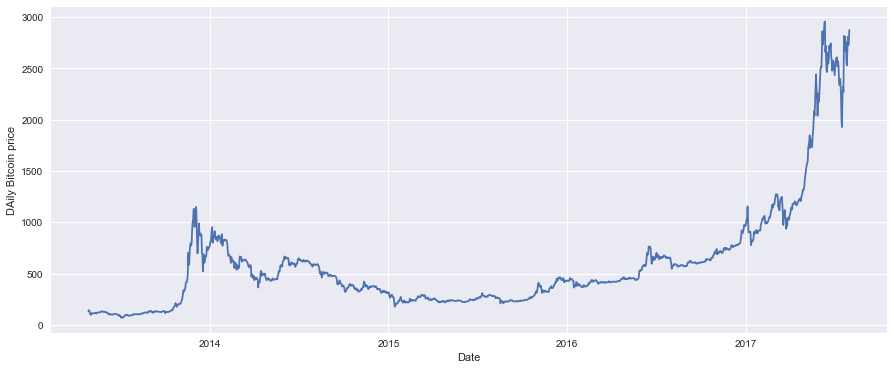

In [9]:
data['Close'].plot()
plt.ylabel("DAily Bitcoin price")

In [10]:
data = data['Close']

Text(0, 0.5, 'Weekly bitcoin price')

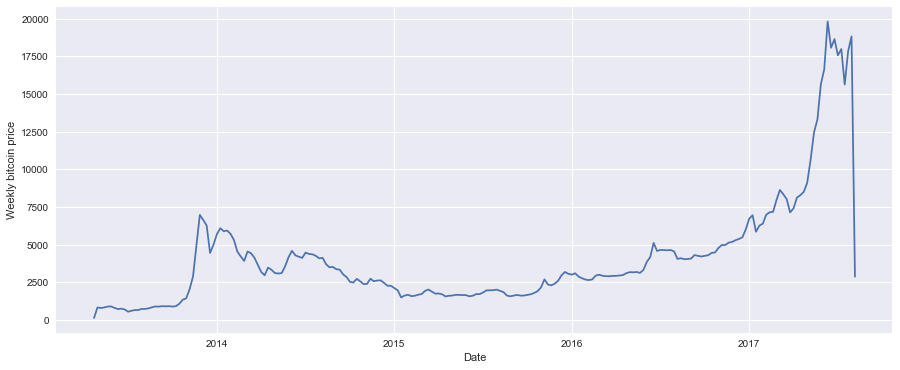

In [11]:
weekly = data.resample('W').sum()
weekly.plot()
plt.ylabel('Weekly bitcoin price')

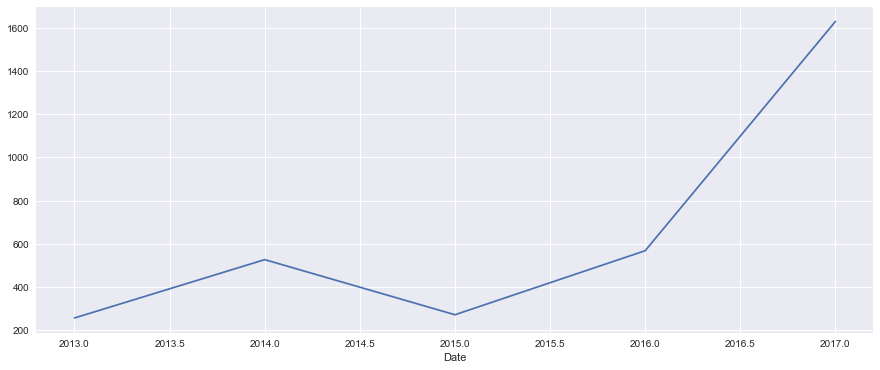

In [12]:
by_year = data.groupby(data.index.year).mean()
by_year.plot()

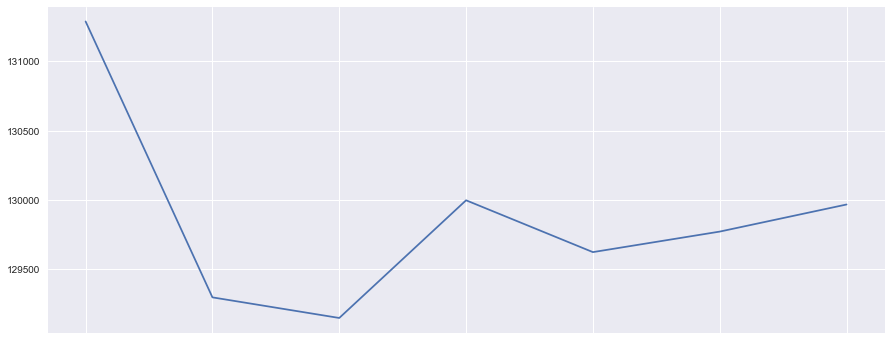

In [13]:
by_weekday = data.groupby(data.index.dayofweek).sum()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot()

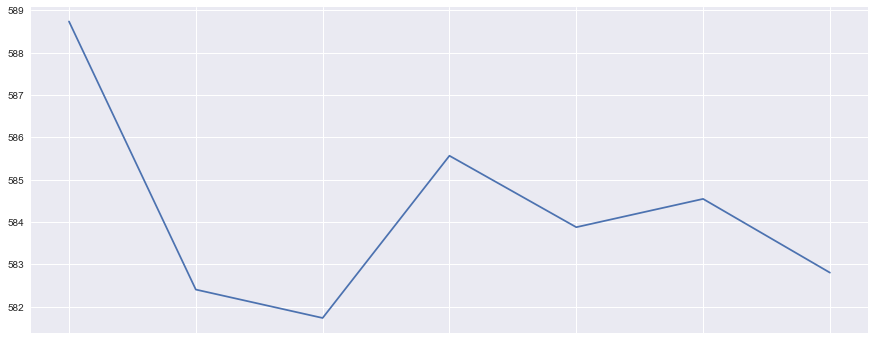

In [14]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot()

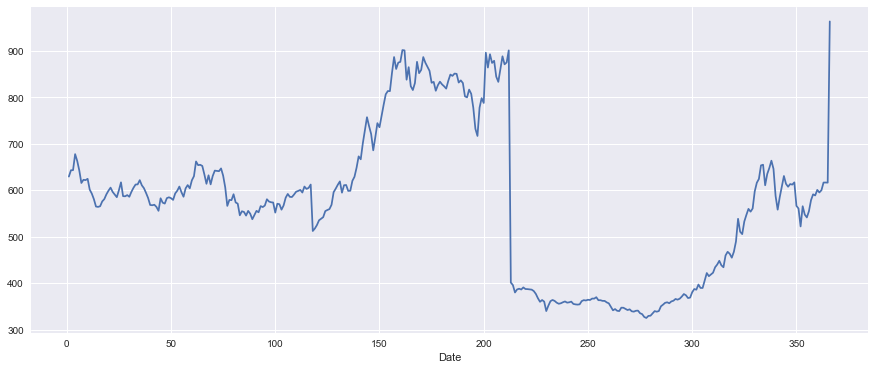

In [15]:
by_day = data.groupby(data.index.dayofyear).mean()
by_day.plot()

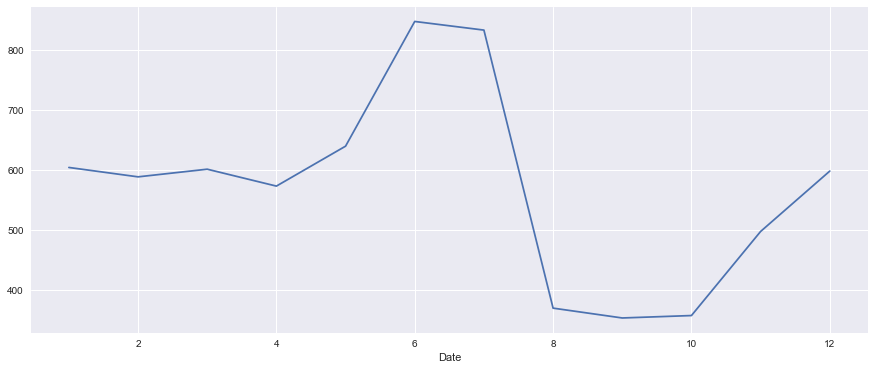

In [16]:
by_month = data.groupby(data.index.month).mean()
by_month.plot()

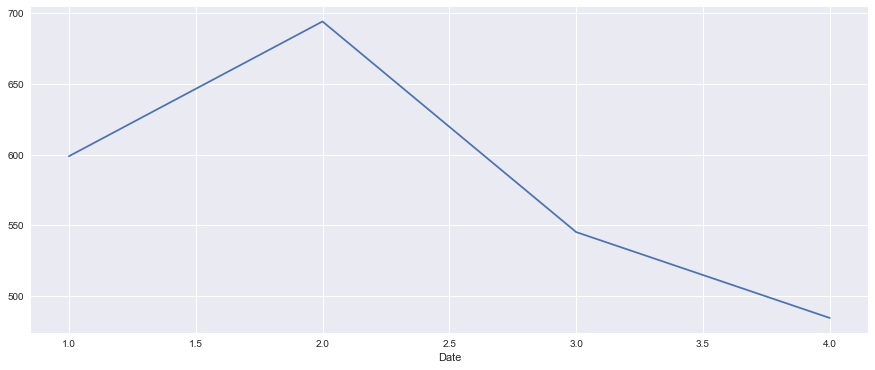

In [17]:
by_quarter = data.groupby(data.index.quarter).mean()
by_quarter.plot()

Date
1    AxesSubplot(0.125,0.2;0.775x0.68)
2    AxesSubplot(0.125,0.2;0.775x0.68)
3    AxesSubplot(0.125,0.2;0.775x0.68)
4    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Close, dtype: object

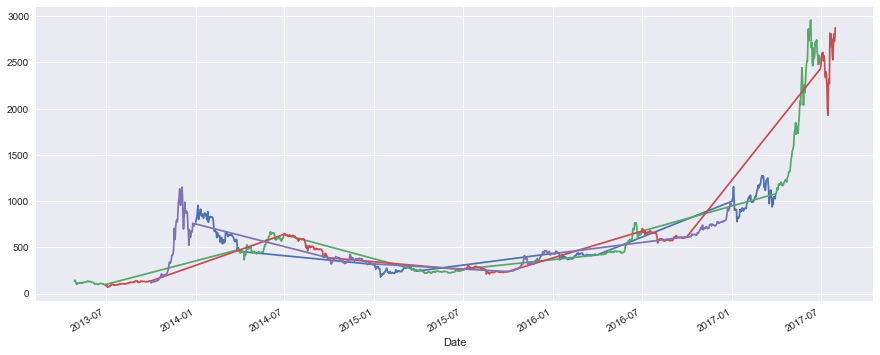

In [18]:
by_quarter = data.groupby(data.index.quarter)
by_quarter.plot()

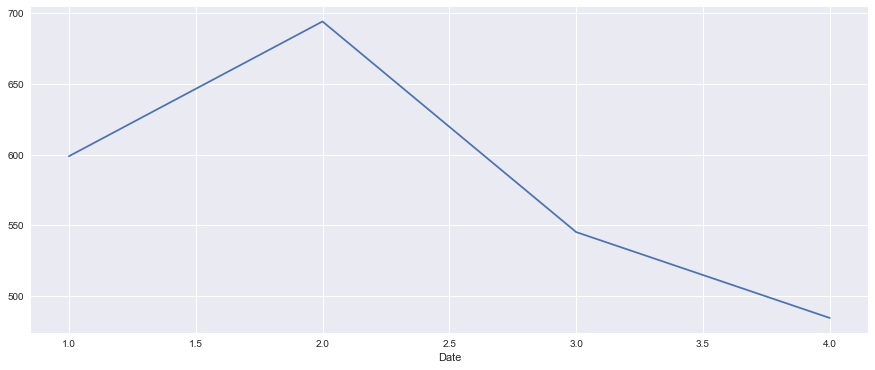

In [19]:
by_quarter_overall = data.groupby(data.index.quarter).mean()
by_quarter_overall.plot()

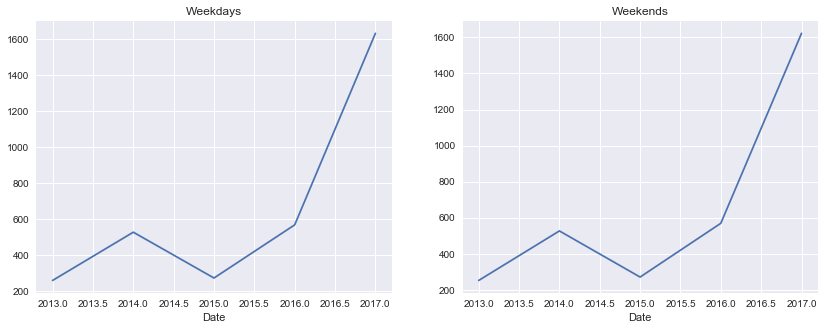

In [20]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.year]).mean()
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays')
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends')

In [21]:
ts = data

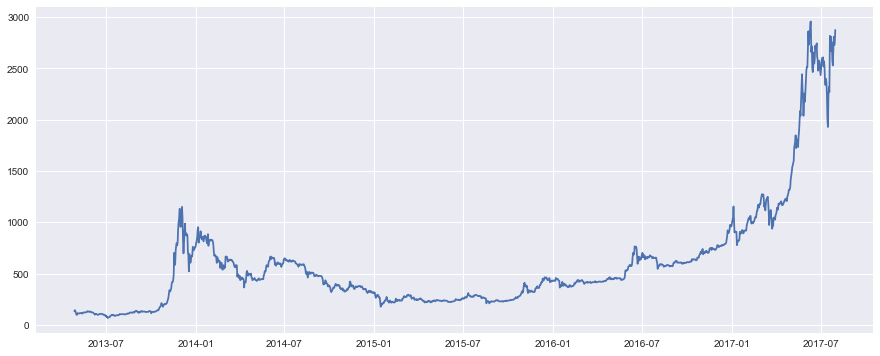

In [22]:
plt.plot(ts)

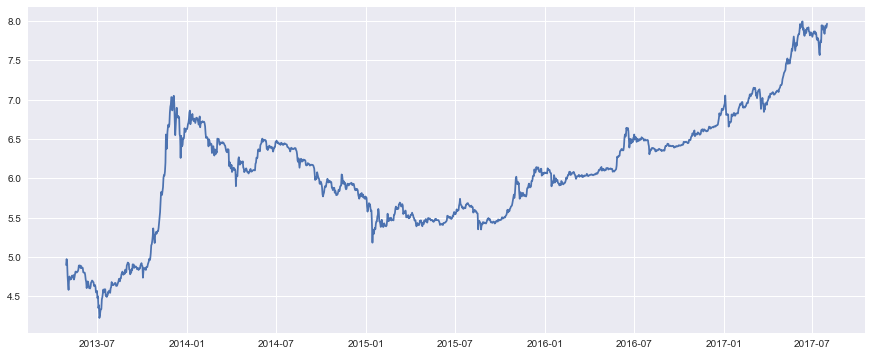

In [23]:
ts_logtransformed = np.log(ts)
plt.plot(ts_logtransformed)

In [24]:
ts_logtransformed.head(10)

Date
2013-04-28    4.899406
2013-04-29    4.973556
2013-04-30    4.934474
2013-05-01    4.762088
2013-05-02    4.655958
2013-05-03    4.582413
2013-05-04    4.722953
2013-05-05    4.752814
2013-05-06    4.721174
2013-05-07    4.714025
Name: Close, dtype: float64

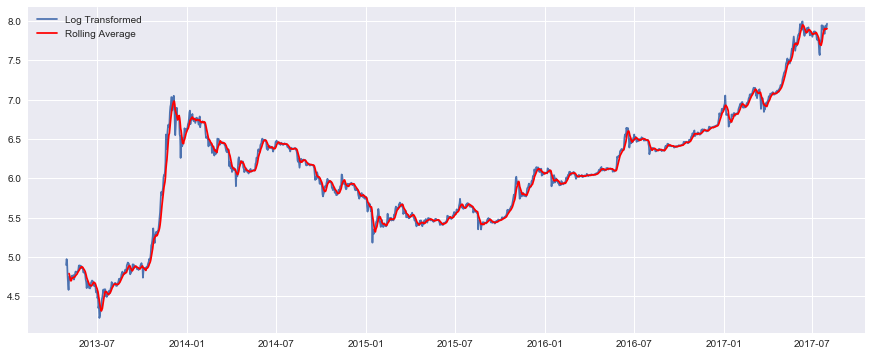

In [25]:
Rolling_average = ts_logtransformed.rolling(window = 7, center= False).mean()
plt.plot(ts_logtransformed, label = 'Log Transformed')
plt.plot(Rolling_average, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')

In [26]:
Rolling_average.head(10)

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-04    4.790121
2013-05-05    4.769180
2013-05-06    4.733125
2013-05-07    4.701632
Name: Close, dtype: float64

In [27]:
log_Rolling_difference = ts_logtransformed - Rolling_average
log_Rolling_difference.head(10)
log_Rolling_difference.tail(10)

Date
2017-07-22    0.151593
2017-07-23    0.073239
2017-07-24    0.051861
2017-07-25   -0.030130
2017-07-26   -0.063797
2017-07-27   -0.001463
2017-07-28    0.041254
2017-07-29    0.015741
2017-07-30    0.025554
2017-07-31    0.061402
Name: Close, dtype: float64

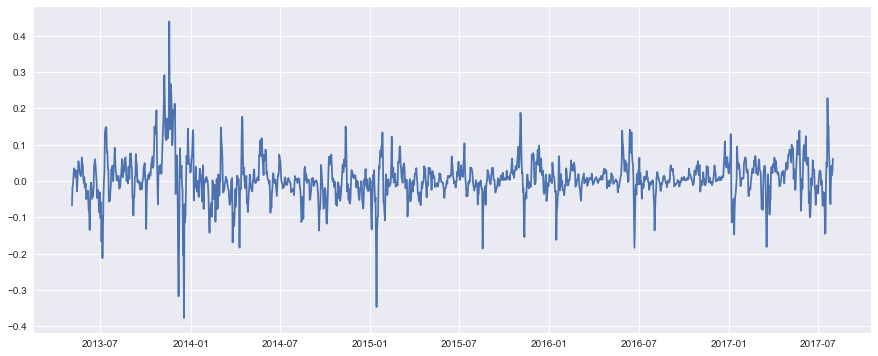

In [28]:
log_Rolling_difference.dropna(inplace=True)
plt.plot(log_Rolling_difference)

In [29]:
test_for_stationary(log_Rolling_difference)


NameError: name 'test_for_stationary' is not defined

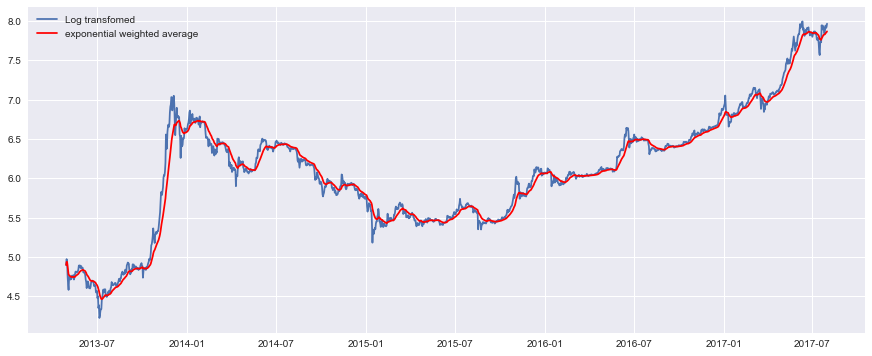

In [30]:
expwighted_avg = ts_logtransformed.ewm(halflife=7,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(ts_logtransformed, label = 'Log transfomed')
plt.plot(expwighted_avg, color='red', label = 'exponential weighted average')
plt.legend(loc = 'best')

In [31]:
expwighted_avg.head(10)


Date
2013-04-28    4.899406
2013-04-29    4.938315
2013-04-30    4.936906
2013-05-01    4.886513
2013-05-02    4.830850
2013-05-03    4.778564
2013-05-04    4.768079
2013-05-05    4.765448
2013-05-06    4.758372
2013-05-07    4.751720
Name: Close, dtype: float64

In [32]:
log_expmovwt_diff = ts_logtransformed - expwighted_avg

test_for_stationary(log_expmovwt_diff)

NameError: name 'test_for_stationary' is not defined

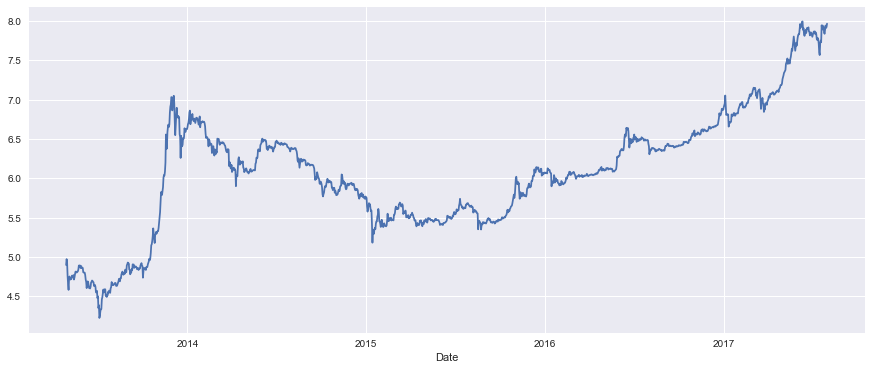

In [33]:
ts_logtransformed.plot()

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-04         NaN
2013-05-05   -0.146592
2013-05-06   -0.252382
2013-05-07   -0.220449
Name: Close, dtype: float64

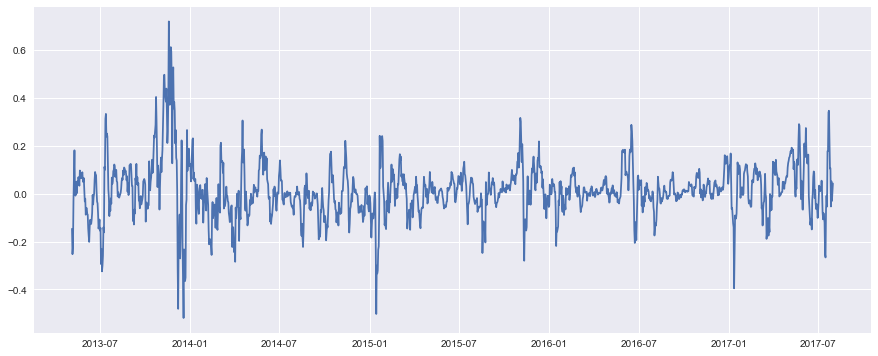

In [34]:
ts_diff_logtrans = ts_logtransformed -ts_logtransformed.shift(7)
plt.plot(ts_diff_logtrans)
ts_diff_logtrans.head(10)

In [35]:
ts_diff_logtrans.dropna(inplace=True)
test_for_stationary(ts_diff_logtrans)

NameError: name 'test_for_stationary' is not defined

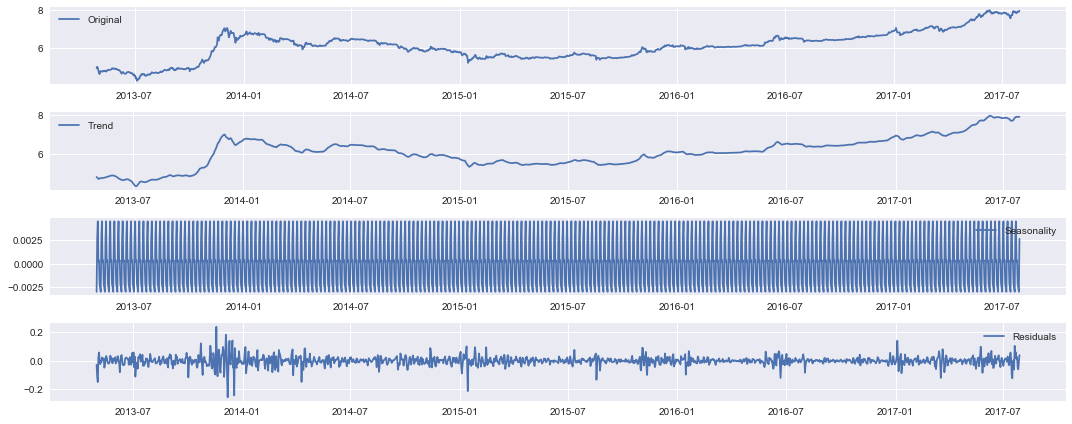

In [36]:
decomposition = seasonal_decompose(ts_logtransformed)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_logtransformed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [37]:
decomposed_TS = residual
decomposed_TS.dropna(inplace=True)
test_for_stationary(decomposed_TS)

NameError: name 'test_for_stationary' is not defined

In [38]:
#ACF and PACF plots:
lag_acf = acf(ts_diff_logtrans, nlags=30)
lag_pacf = pacf(ts_diff_logtrans, nlags=50, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

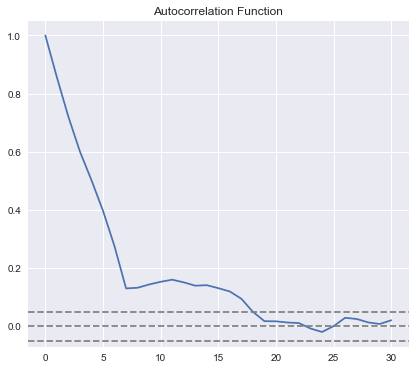

In [39]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

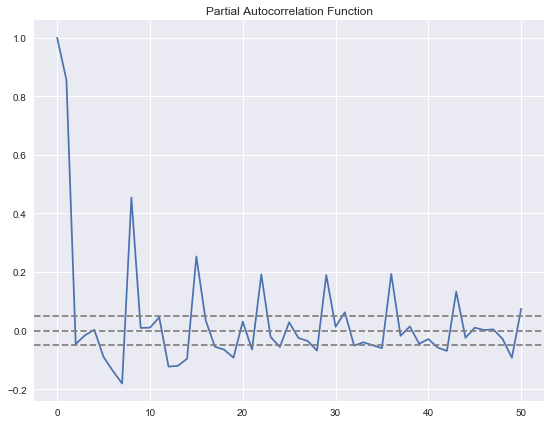

In [40]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

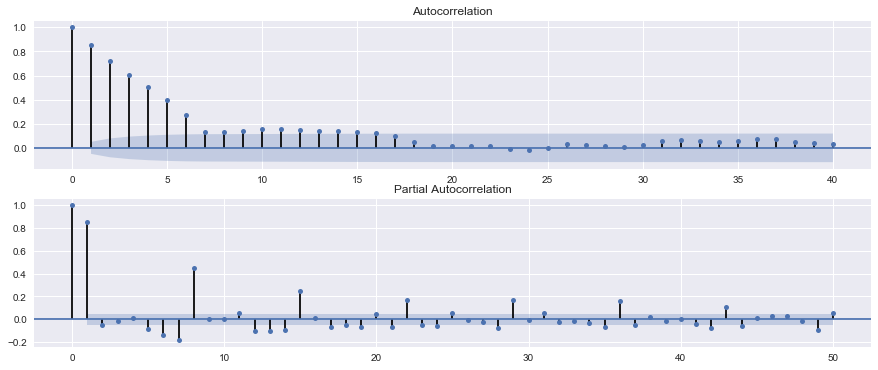

In [41]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts_diff_logtrans, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(ts_diff_logtrans, ax=pyplot.gca(), lags=50)
pyplot.show()

In [42]:
from statsmodels.tsa.arima_model import ARIMA


In [43]:
ts_diff_logtrans = ts_diff_logtrans.fillna(0)


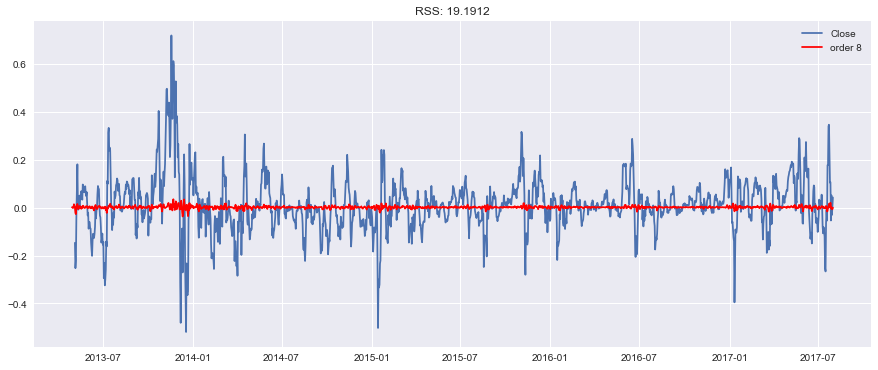

In [44]:
model = ARIMA(ts_logtransformed, order=(8, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 8')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc = 'best')

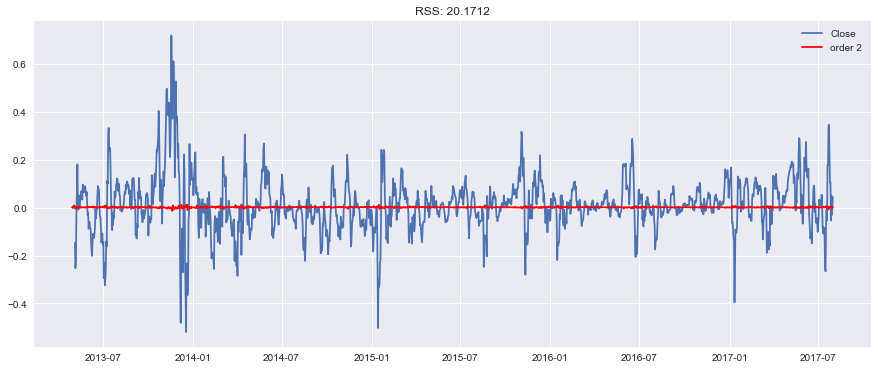

In [45]:
model = ARIMA(ts_logtransformed, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 2')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc ='best')

In [46]:
print(results_AR.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                 ARIMA(2, 1, 0)   Log Likelihood                2704.690
Method:                       css-mle   S.D. of innovations              0.042
Date:                Thu, 29 Nov 2018   AIC                          -5401.380
Time:                        15:43:48   BIC                          -5379.984
Sample:                    04-29-2013   HQIC                         -5393.424
                         - 07-31-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0020      0.001      1.908      0.057   -5.37e-05       0.004
ar.L1.D.Close    -0.0011      0.025     -0.044      0.965      -0.051       0.049
ar.L2.D.Close    -0.0435      0.025     

Text(0.5, 1.0, 'RSS: 19.0817')

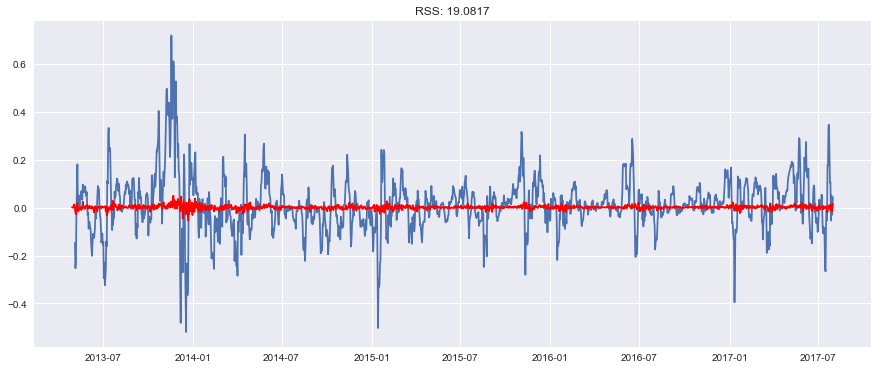

In [47]:
model = ARIMA(ts_logtransformed, order=(0, 1,18)) 
results_MA = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_MA.fittedvalues, color='red')
RSS = results_MA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))

In [48]:
#model summary
print(results_MA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                ARIMA(0, 1, 18)   Log Likelihood                2727.323
Method:                       css-mle   S.D. of innovations              0.042
Date:                Thu, 29 Nov 2018   AIC                          -5414.646
Time:                        15:44:18   BIC                          -5307.661
Sample:                    04-29-2013   HQIC                         -5374.862
                         - 07-31-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0019      0.001      1.374      0.169      -0.001       0.005
ma.L1.D.Close     -0.0100      0.026     -0.390      0.697      -0.060       0.040
ma.L2.D.Close     -0.0373      0.025

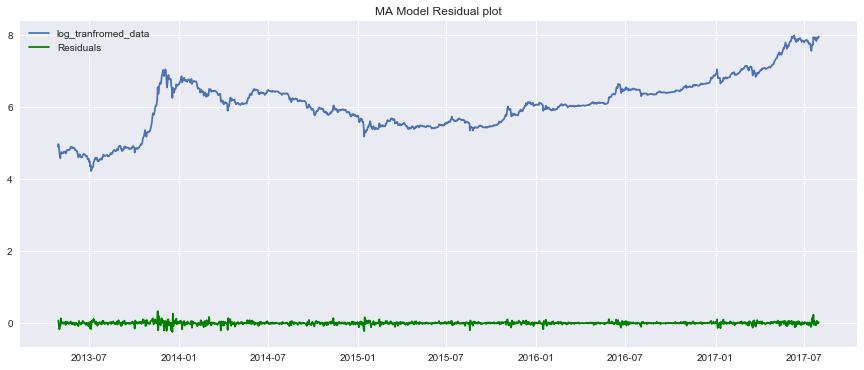

In [49]:
plt.plot(ts_logtransformed, label = 'log_tranfromed_data')
plt.plot(results_MA.resid, color ='green',label= 'Residuals')
plt.title('MA Model Residual plot')
plt.legend(loc = 'best')

count    1555.000000
mean        0.000053
std         0.041911
min        -0.246817
25%        -0.013552
50%         0.000411
75%         0.015719
max         0.332676
dtype: float64


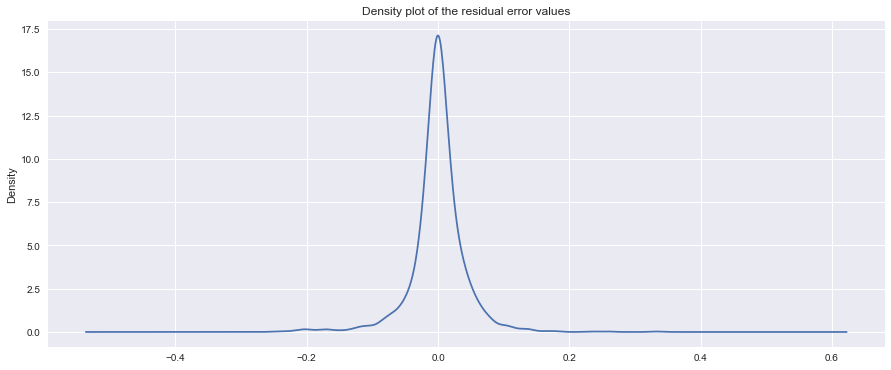

In [50]:
results_MA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_MA.resid.describe())

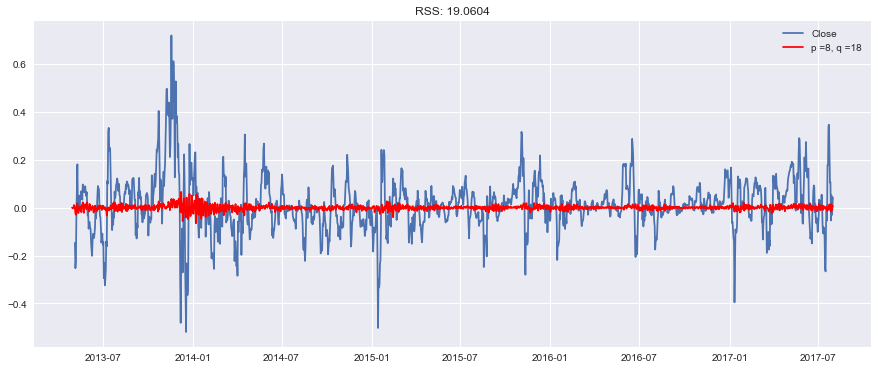

In [51]:
model = ARIMA(ts_logtransformed, order=(8, 1, 18))  
results_ARIMA = model.fit(trend= 'nc', disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_ARIMA.fittedvalues, color='red', label = 'p =8, q =18')
RSS =results_ARIMA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc='best')

In [52]:
#model summary
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                ARIMA(8, 1, 18)   Log Likelihood                2744.939
Method:                       css-mle   S.D. of innovations              0.041
Date:                Thu, 29 Nov 2018   AIC                          -5435.878
Time:                        15:51:47   BIC                          -5291.449
Sample:                    04-29-2013   HQIC                         -5382.170
                         - 07-31-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.D.Close     -1.2598      0.318     -3.965      0.000      -1.883      -0.637
ar.L2.D.Close     -0.7754      0.507     -1.529      0.126      -1.769       0.219
ar.L3.D.Close     -0.7147      0.417

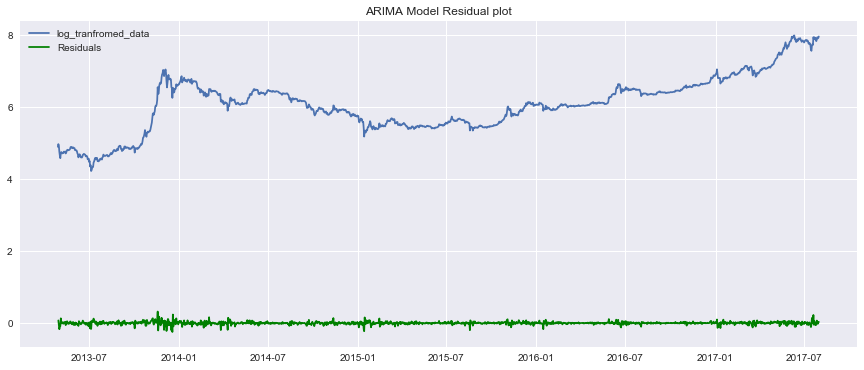

In [53]:
plt.plot(ts_logtransformed, label = 'log_tranfromed_data')
plt.plot(results_ARIMA.resid, color ='green',label= 'Residuals')
plt.title('ARIMA Model Residual plot')
plt.legend(loc = 'best')

count    1555.000000
mean        0.001500
std         0.041420
min        -0.246336
25%        -0.012670
50%         0.001621
75%         0.018297
max         0.320604
dtype: float64


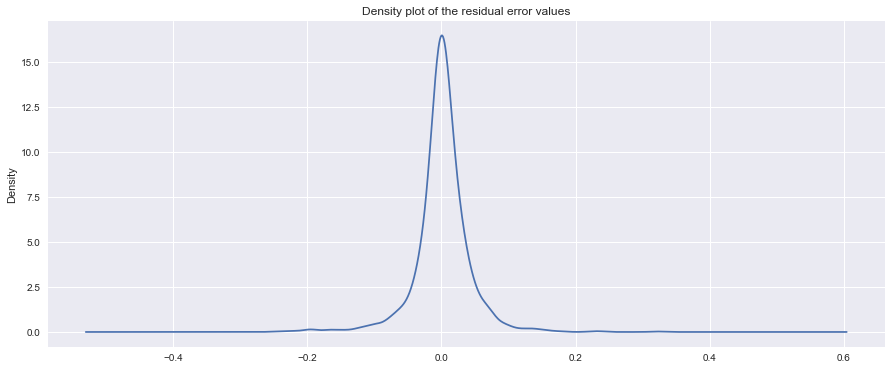

In [54]:
results_ARIMA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_ARIMA.resid.describe())

In [57]:
test = pd.read_csv("bitcoin_price_1week_Test - Test.csv",index_col= 'Date')
test.index = pd.to_datetime(test.index)
test = test['Close']
test = test.sort_index()
test

Date
2017-08-01    2718.26
2017-08-02    2710.67
2017-08-03    2804.73
2017-08-04    2895.89
2017-08-05    3252.91
2017-08-06    3213.94
2017-08-07    3378.94
Name: Close, dtype: float64

In [58]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2013-04-29    0.000000
2013-04-30   -0.000021
2013-05-01   -0.002728
2013-05-02    0.000189
2013-05-03    0.011427
dtype: float64


In [59]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2013-04-29    0.000000
2013-04-30   -0.000021
2013-05-01   -0.002749
2013-05-02   -0.002560
2013-05-03    0.008867
dtype: float64


In [60]:
predictions_ARIMA_log = pd.Series(ts_logtransformed.iloc[0], index=ts_logtransformed.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2013-04-28    4.899406
2013-04-29    4.899406
2013-04-30    4.899385
2013-05-01    4.896657
2013-05-02    4.896846
dtype: float64

Text(0.5, 1.0, 'RMSE: 636.1256')

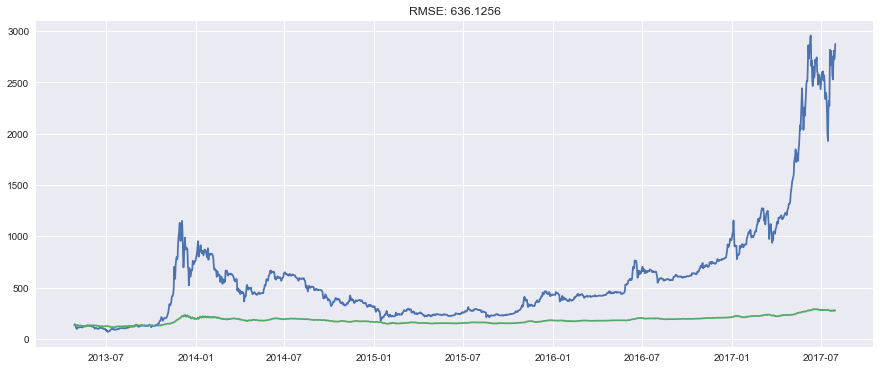

In [61]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data)**2)/len(data)))

In [62]:
dates = [pd.Timestamp('2017-08-01'), pd.Timestamp('2017-08-02'), pd.Timestamp('2017-08-03'),pd.Timestamp('2017-08-04'), pd.Timestamp('2017-08-05'), pd.Timestamp('2017-08-06'), pd.Timestamp('2017-08-07')]

forecast = pd.Series(results_ARIMA.forecast(steps=7)[0],dates)
forecast = np.exp(forecast)
print(forecast)
error = mean_squared_error(test, forecast)
print('Test MSE: %.3f' % error)

2017-08-01    2878.423965
2017-08-02    2933.834546
2017-08-03    3007.147357
2017-08-04    3025.484384
2017-08-05    2979.588861
2017-08-06    3019.341003
2017-08-07    2951.502652
dtype: float64
Test MSE: 61214.043


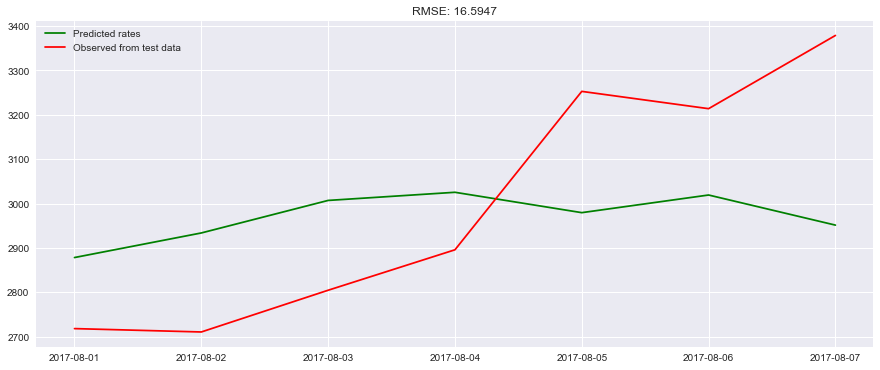

In [63]:
plt.plot(forecast, color ='green', label ='Predicted rates')
plt.plot(test, color = 'red', label = 'Observed from test data')
plt.title('RMSE: %.4f'% np.sqrt(sum((forecast-test)**2)/len(data)))
plt.legend(loc = 'best')

In [64]:
predictions_MA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print(predictions_MA_diff.head())

Date
2013-04-29    0.001941
2013-04-30    0.001458
2013-05-01    0.000081
2013-05-02    0.002704
2013-05-03    0.013811
dtype: float64


In [65]:
predictions_MA_diff_cumsum = predictions_MA_diff.cumsum()
print(predictions_MA_diff_cumsum.head())

Date
2013-04-29    0.001941
2013-04-30    0.003399
2013-05-01    0.003479
2013-05-02    0.006184
2013-05-03    0.019995
dtype: float64


In [66]:
predictions_MA_log = pd.Series(ts_logtransformed.iloc[0], index=ts_logtransformed.index)
predictions_MA_log = predictions_MA_log.add(predictions_MA_diff_cumsum,fill_value=0)
predictions_MA_log.head()

Date
2013-04-28    4.899406
2013-04-29    4.901347
2013-04-30    4.902805
2013-05-01    4.902885
2013-05-02    4.905590
dtype: float64

Text(0.5, 1.0, 'RMSE: 362.5190')

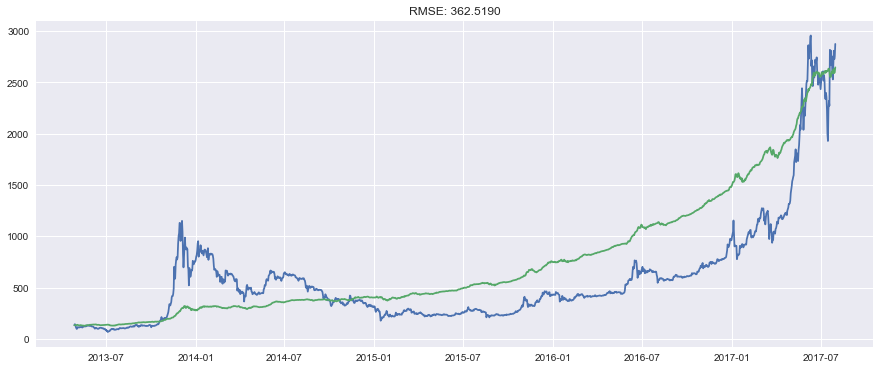

In [67]:
predictions_MA = np.exp(predictions_MA_log)
plt.plot(data)
plt.plot(predictions_MA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_MA-data)**2)/len(data)))

In [68]:
dates = [pd.Timestamp('2017-08-01'), pd.Timestamp('2017-08-02'), pd.Timestamp('2017-08-03'),pd.Timestamp('2017-08-04'), pd.Timestamp('2017-08-05'), pd.Timestamp('2017-08-06'), pd.Timestamp('2017-08-07')]

forecast = pd.Series(results_MA.forecast(steps=7)[0],dates)
forecast = np.exp(forecast)
print(forecast)
error = mean_squared_error(test, forecast)
print('Test MSE: %.3f' % error)

2017-08-01    2873.760821
2017-08-02    2933.263330
2017-08-03    2985.844244
2017-08-04    3001.085554
2017-08-05    2982.756423
2017-08-06    3057.338301
2017-08-07    3063.278141
dtype: float64
Test MSE: 44963.747


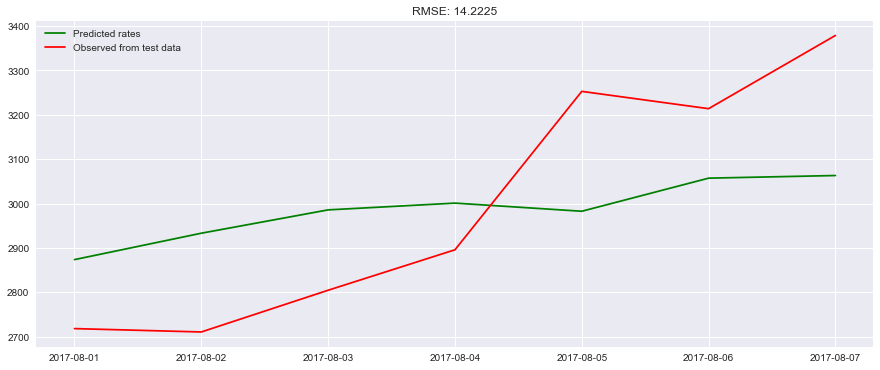

In [69]:
plt.plot(forecast, color ='green', label ='Predicted rates')
plt.plot(test, color = 'red', label = 'Observed from test data')
plt.title('RMSE: %.4f'% np.sqrt(sum((forecast-test)**2)/len(data)))
plt.legend(loc = 'best')

Date
2013-04-30    139.250000
2013-05-31    119.993226
2013-06-30    107.761333
2013-07-31     90.512258
2013-08-31    113.905161
2013-09-30    130.061667
2013-10-31    158.311935
2013-11-30    550.420667
2013-12-31    800.780968
2014-01-31    844.168387
2014-02-28    661.618214
2014-03-31    592.200323
2014-04-30    461.362000
Freq: M, Name: Close, dtype: float64


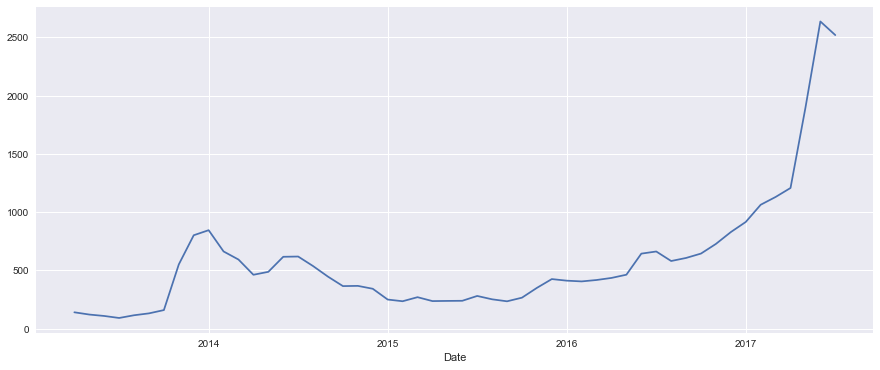

In [70]:
monthly_mean = data.resample('M').mean()
monthly_mean
print(monthly_mean.head(13))
monthly_mean.plot()

In [71]:
test_logtransformed = np.log(test)

In [72]:
history = [x for x in ts_logtransformed]
predictions = list()
for t in range(len(test)):
    output = results_MA.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_logtransformed[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_logtransformed, predictions)
print('Test MSE: %.3f' % error)

predicted=7.963377, expected=7.907747
predicted=7.963377, expected=7.904951
predicted=7.963377, expected=7.939063
predicted=7.963377, expected=7.971048
predicted=7.963377, expected=8.087305
predicted=7.963377, expected=8.075253
predicted=7.963377, expected=8.125317
Test MSE: 0.009


In [73]:
from fbprophet import Prophet


ModuleNotFoundError: No module named 'fbprophet'